In [1]:
pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import mysql.connector

# Establish the connection
connection = mysql.connector.connect(
    host="localhost",       # Replace with your MySQL server host
    user="root",   # Replace with your MySQL username
    password="Root2507@", # Replace with your MySQL password
    
)

# Check if the connection is successful
if connection.is_connected():
    print("Connected to MySQL database")


Connected to MySQL database


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
query='SELECT * FROM trip_analysis.ubertrips'
df=pd.read_sql(query,connection)
print(df)

C:\Users\FJ\AppData\Local\Temp\ipykernel_21052\4249562771.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


        trip_id         pickup_time        dropoff_time  passenger_count  \
0             1 2024-06-01 00:42:00 2024-06-01 01:04:00                1   
1             2 2024-06-01 00:06:00 2024-06-01 00:13:00                1   
2             3 2024-06-01 00:08:00 2024-06-01 00:21:00                1   
3             4 2024-06-01 00:28:00 2024-06-01 00:37:00                1   
4             5 2024-06-01 00:38:00 2024-06-01 00:45:00                1   
...         ...                 ...                 ...              ...   
103723   116918 2024-06-30 23:17:00 2024-06-30 23:35:00                1   
103724   116919 2024-06-30 23:08:00 2024-06-30 23:14:00                1   
103725   116920 2024-06-30 23:38:00 2024-06-30 23:42:00                1   
103726   116923 2024-06-30 23:57:00 2024-07-01 00:05:00                1   
103727   116924 2024-06-30 23:08:00 2024-06-30 23:19:00                1   

        trip_distance  pulocationid  dolocationid  fare_amount  surge_fee  \
0         

In [5]:
q1='SELECT * FROM trip_analysis.location;'

df1=pd.read_sql(q1,connection)
print(df1)

     LocationID                 Location                City
0             1           Newark Airport  Newark, New Jersey
1             2              Jamaica Bay              Queens
2             3  Allerton/Pelham Gardens           The Bronx
3             4            Alphabet City           Manhattan
4             5            Arden Heights       Staten Island
..          ...                      ...                 ...
260       15164         05/06/2024 18:41    05/06/2024 18:52
261         262           Yorkville East           Manhattan
262         263           Yorkville West           Manhattan
263       15166                       NV                 N/A
264         265                       NA                 N/A

[265 rows x 3 columns]


C:\Users\FJ\AppData\Local\Temp\ipykernel_21052\693023807.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1=pd.read_sql(q1,connection)


In [6]:
connection.close()

 ## Looking into our data

In [7]:
df.head()

,trip_id,pickup_time,dropoff_time,passenger_count,trip_distance,pulocationid,dolocationid,fare_amount,surge_fee,vehicle,trip_detailspayment_type
0,1,2024-06-01 00:42:00,2024-06-01 01:04:00,1,5.60,79,226,19.5,2.0,UberX,Uber Pay
1,2,2024-06-01 00:06:00,2024-06-01 00:13:00,1,1.72,142,186,8.0,0.0,Uber Black,Cash
2,3,2024-06-01 00:08:00,2024-06-01 00:21:00,1,3.41,229,238,13.0,0.0,Uber Black,Cash
3,4,2024-06-01 00:28:00,2024-06-01 00:37:00,1,1.81,188,35,9.0,0.0,UberX,Cash
4,5,2024-06-01 00:38:00,2024-06-01 00:45:00,1,1.89,100,137,8.0,0.0,Uber Black,Cash


In [8]:
df.columns

Index(['trip_id', 'pickup_time', 'dropoff_time', 'passenger_count',
       'trip_distance', 'pulocationid', 'dolocationid', 'fare_amount',
       'surge_fee', 'vehicle', 'trip_detailspayment_type'],
      dtype='object')

In [9]:
df.shape

(103728, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103728 entries, 0 to 103727
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   trip_id                   103728 non-null  int64         
 1   pickup_time               103728 non-null  datetime64[ns]
 2   dropoff_time              103728 non-null  datetime64[ns]
 3   passenger_count           103728 non-null  int64         
 4   trip_distance             103728 non-null  float64       
 5   pulocationid              103728 non-null  int64         
 6   dolocationid              103728 non-null  int64         
 7   fare_amount               103728 non-null  float64       
 8   surge_fee                 103728 non-null  float64       
 9   vehicle                   103728 non-null  object        
 10  trip_detailspayment_type  103728 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usag

# Descriptive statistics/ Univariate Analysis

In [11]:
df.describe()

,trip_id,pickup_time,dropoff_time,passenger_count,trip_distance,pulocationid,dolocationid,fare_amount,surge_fee
count,103728.000000,103728,103728,103728.000000,103728.000000,103728.000000,103728.000000,103728.000000,103728.000000
mean,57422.229196,2024-06-17 08:18:07.280772864,2024-06-17 08:33:59.035169024,1.412136,3.363931,159.241410,153.537907,12.998337,1.985260
min,1.000000,2024-06-01 00:00:00,2024-06-01 00:10:00,1.000000,1.010000,1.000000,1.000000,2.500000,0.000000
25%,27899.750000,2024-06-10 07:09:00,2024-06-10 07:21:45,1.000000,1.530000,107.000000,87.000000,7.500000,0.000000
50%,56618.500000,2024-06-17 19:37:00,2024-06-17 19:50:00,1.000000,2.280000,151.000000,151.000000,10.000000,2.000000
75%,86859.250000,2024-06-24 18:45:15,2024-06-24 18:58:00,1.000000,3.800000,234.000000,233.000000,14.500000,3.000000
max,116924.000000,2024-06-30 23:58:00,2024-07-01 17:21:00,6.000000,144.100000,265.000000,265.000000,563.790000,118.000000
std,33812.530174,NaN,NaN,1.031418,3.192828,68.133216,73.585841,9.078582,2.429827


## Checking for null values


In [12]:
pd.isnull(df).sum()

trip_id                     0
pickup_time                 0
dropoff_time                0
passenger_count             0
trip_distance               0
pulocationid                0
dolocationid                0
fare_amount                 0
surge_fee                   0
vehicle                     0
trip_detailspayment_type    0
dtype: int64

## Setting up the revenue column

In [13]:
df['total_revenue']=df['fare_amount']+df['surge_fee']
df['total_revenue']

0         21.5
1          8.0
2         13.0
3          9.0
4          8.0
          ... 
103723    27.0
103724     7.5
103725     9.0
103726    10.0
103727    19.5
Name: total_revenue, Length: 103728, dtype: float64

## Descripitive analysis for our revenue column

In [14]:
df['total_revenue'].describe()

count    103728.000000
mean         14.983596
std          10.111491
min           2.500000
25%           9.000000
50%          12.000000
75%          17.000000
max         563.790000
Name: total_revenue, dtype: float64

### Add a few columns to our data

##### Day of week

In [15]:
#day of the week with most rides-- daily trend
df['weekday']=df['pickup_time'].dt.day_name()
df['weekday']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
            ...   
103723      Sunday
103724      Sunday
103725      Sunday
103726      Sunday
103727      Sunday
Name: weekday, Length: 103728, dtype: object

##### Month with most rides -- monthly trend

In [16]:
#data on the month of june only
df['month']=df['pickup_time'].dt.month_name()
df['month']

0         June
1         June
2         June
3         June
4         June
          ... 
103723    June
103724    June
103725    June
103726    June
103727    June
Name: month, Length: 103728, dtype: object

##### Trips by hour

In [17]:
df['hour']=df['pickup_time'].dt.hour
df['hour']

0          0
1          0
2          0
3          0
4          0
          ..
103723    23
103724    23
103725    23
103726    23
103727    23
Name: hour, Length: 103728, dtype: int32

##### Weekly 
###### There are 4/5 weeks in a month ,this is to help with weekly analysis

In [18]:
df['weekly']=df['pickup_time'].dt.isocalendar().week
df['weekly']

0         22
1         22
2         22
3         22
4         22
          ..
103723    26
103724    26
103725    26
103726    26
103727    26
Name: weekly, Length: 103728, dtype: UInt32

## Customization of visuals

In [19]:
sns.set_style('dark')

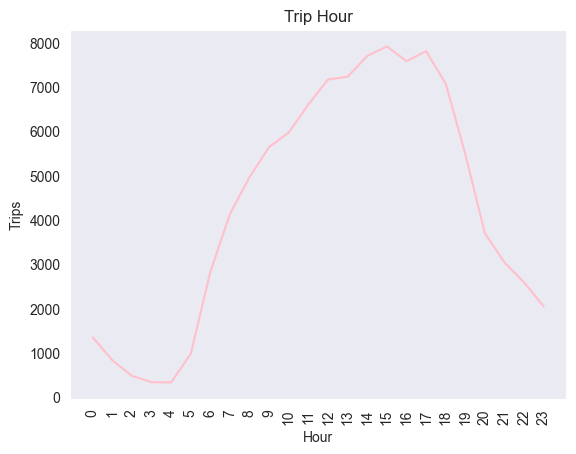

<Figure size 800x600 with 0 Axes>

In [20]:
hourly_trips=df.groupby('hour')['pickup_time'].count()
sns.lineplot(x=hourly_trips.index,y=hourly_trips.values,color='pink')
plt.title("Trip Hour")
plt.xlabel('Hour')
plt.ylabel('Trips')
plt.xticks(range(0,24),rotation=90)
plt.figure(figsize=(8,6))
plt.show()

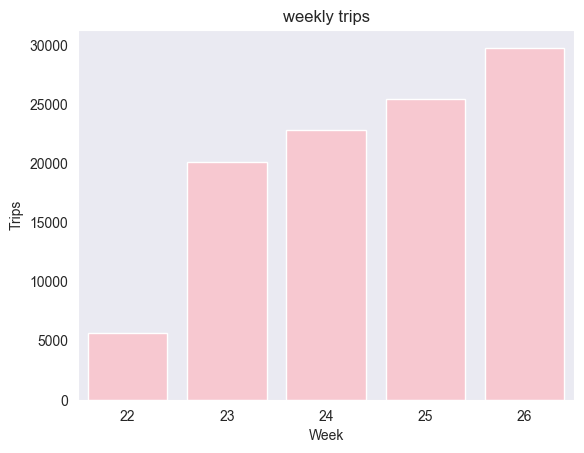

<Figure size 800x600 with 0 Axes>

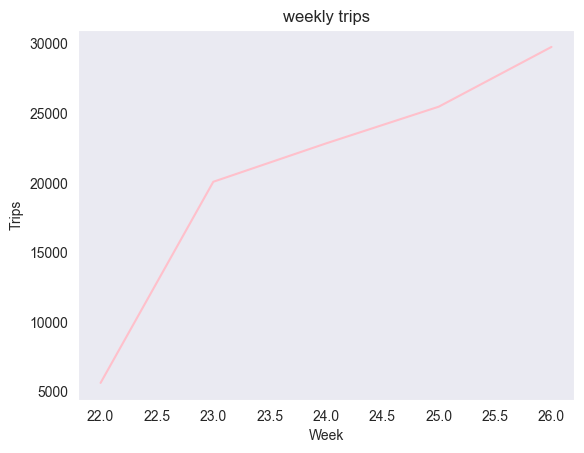

<Figure size 800x600 with 0 Axes>

In [21]:
weekly_trips=df.groupby('weekly')['pickup_time'].count()
sns.barplot(x=weekly_trips.index,y=weekly_trips.values,color='pink')
plt.title("weekly trips")
plt.xlabel('Week')
plt.ylabel('Trips')
plt.figure(figsize=(8,6))
plt.show()
sns.lineplot(weekly_trips,color='pink')
plt.title("weekly trips")
plt.xlabel('Week')
plt.ylabel('Trips')
plt.figure(figsize=(8,6))
plt.show()

In [22]:
sales=df.groupby('weekly')['total_revenue'].sum()
sales

weekly
22     84076.00
23    301823.16
24    338008.50
25    383524.04
26    446786.75
Name: total_revenue, dtype: float64

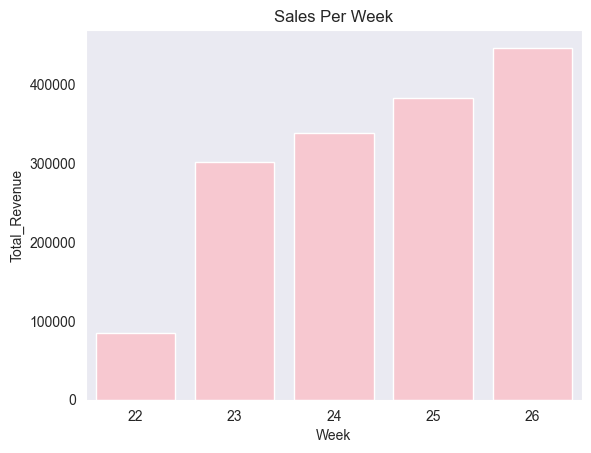

<Figure size 800x600 with 0 Axes>

In [23]:
sns.barplot(sales,color='pink')
plt.title('Sales Per Week')
plt.xlabel('Week')
plt.ylabel('Total_Revenue')
plt.figure(figsize=(8,6))
plt.show()

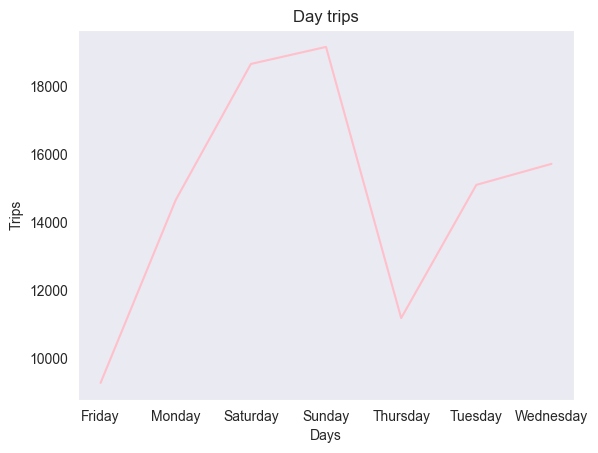

<Figure size 800x600 with 0 Axes>

In [24]:
weekday_trips=df.groupby('weekday')['trip_id'].count()
sns.lineplot(weekday_trips,color='pink')
plt.title("Day trips")
plt.xlabel('Days')
plt.ylabel('Trips')
plt.figure(figsize=(8,6))
plt.show()

In [25]:
#days when the most revenue is made
df.groupby('weekday')['total_revenue'].sum().sort_values(ascending=False)

weekday
Sunday       282813.70
Saturday     276298.45
Wednesday    238636.50
Tuesday      224421.96
Monday       212902.70
Thursday     172718.12
Friday       146427.02
Name: total_revenue, dtype: float64

In [26]:
weekly_sales=df.groupby(['weekly','weekday'])['total_revenue'].sum()
weekly_sales

weekly  weekday  
22      Saturday     43874.50
        Sunday       40201.50
23      Friday       32995.50
        Monday       36565.00
        Saturday     50837.50
        Sunday       54923.20
        Thursday     39557.00
        Tuesday      41596.96
        Wednesday    45348.00
24      Friday       30489.50
        Monday       53263.50
        Saturday     50376.00
        Sunday       52551.00
        Thursday     40051.00
        Tuesday      54391.00
        Wednesday    56886.50
25      Friday       38465.50
        Monday       54683.70
        Saturday     62485.00
        Sunday       65220.00
        Thursday     42393.34
        Tuesday      57687.50
        Wednesday    62589.00
26      Friday       44476.52
        Monday       68390.50
        Saturday     68725.45
        Sunday       69918.00
        Thursday     50716.78
        Tuesday      70746.50
        Wednesday    73813.00
Name: total_revenue, dtype: float64

### Trip duration

In [27]:
df['trip_duration']=(df['dropoff_time']-df['pickup_time']).dt.total_seconds()/60
df['trip_duration']

0         22.0
1          7.0
2         13.0
3          9.0
4          7.0
          ... 
103723    18.0
103724     6.0
103725     4.0
103726     8.0
103727    11.0
Name: trip_duration, Length: 103728, dtype: float64

In [28]:
#total duration covered weekly
df.groupby('weekday')['trip_duration'].sum().sort_values(ascending=False)

weekday
Sunday       307492.0
Saturday     290392.0
Wednesday    248808.0
Tuesday      247056.0
Monday       234152.0
Thursday     174744.0
Friday       142749.0
Name: trip_duration, dtype: float64

### Trips made by various Vehicles

In [29]:
trip_count=df.groupby('vehicle')['trip_id'].count()
sorted_trip_count=trip_count.sort_values(ascending=False)
sorted_trip_count

vehicle
UberX           38744
Uber Comfort    17078
Uber Black      16710
UberXL          16698
Uber Green      14498
Name: trip_id, dtype: int64

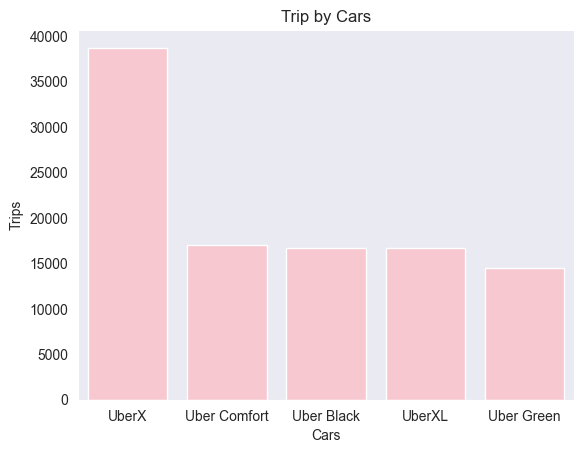

<Figure size 800x600 with 0 Axes>

In [30]:
sns.barplot(sorted_trip_count,color='pink')
plt.title('Trip by Cars')
plt.xlabel('Cars')
plt.ylabel('Trips')
plt.figure(figsize=(8,6))
plt.show()

### Revenue Generated by various vehicles

In [31]:
#which cars generated the most revenue 
car_rev= df.groupby('vehicle')['total_revenue'].sum().sort_values(ascending=False)
car_rev

vehicle
UberX           584047.77
Uber Comfort    254102.98
Uber Black      250316.00
UberXL          249519.50
Uber Green      216232.20
Name: total_revenue, dtype: float64

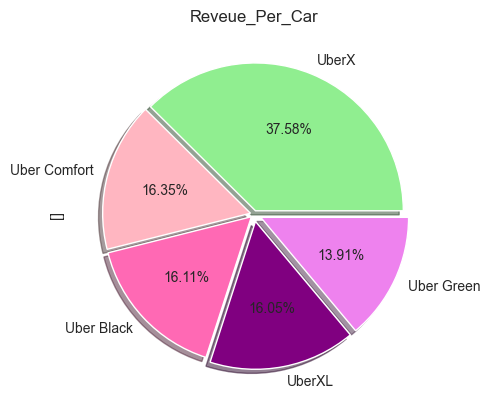

In [32]:
car_rev.plot(kind='pie',autopct='%2.2f%%',colors=['lightgreen','lightpink','hotpink','purple','violet' ],explode=[0.025,0.025,0.025,0.05,0.05],shadow=True)
plt.title('Reveue_Per_Car')
plt.ylabel([])
plt.show()

In [33]:
payment_method=df.groupby('trip_detailspayment_type')['trip_id'].count()
ordered_pm=payment_method.sort_values(ascending=False)
print(ordered_pm)

trip_detailspayment_type
Uber Pay      69530
Cash          33434
Amazon Pay      584
Google Pay      180
Name: trip_id, dtype: int64


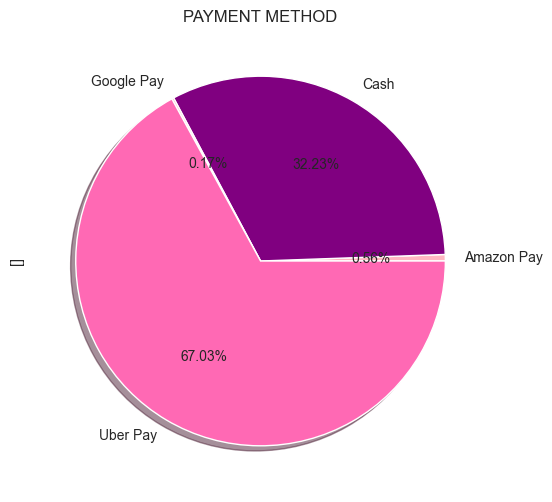

In [34]:
plt.figure(figsize=(8,6))
payment_method.plot(kind='pie',autopct='%2.2f%%',colors=['lightpink','purple','lightpink','hotpink'],shadow=True)
plt.title('PAYMENT METHOD')
plt.ylabel([])
plt.show()

In [35]:
df1.head(1)

,LocationID,Location,City
0,1,Newark Airport,"Newark, New Jersey"


In [36]:
loc=df1.join(df)
loc

,LocationID,Location,City,trip_id,pickup_time,dropoff_time,passenger_count,trip_distance,pulocationid,dolocationid,fare_amount,surge_fee,vehicle,trip_detailspayment_type,total_revenue,weekday,month,hour,weekly,trip_duration
0,1,Newark Airport,"Newark, New Jersey",1,2024-06-01 00:42:00,2024-06-01 01:04:00,1,5.60,79,226,19.5,2.0,UberX,Uber Pay,21.5,Saturday,June,0,22,22.0
1,2,Jamaica Bay,Queens,2,2024-06-01 00:06:00,2024-06-01 00:13:00,1,1.72,142,186,8.0,0.0,Uber Black,Cash,8.0,Saturday,June,0,22,7.0
2,3,Allerton/Pelham Gardens,The Bronx,3,2024-06-01 00:08:00,2024-06-01 00:21:00,1,3.41,229,238,13.0,0.0,Uber Black,Cash,13.0,Saturday,June,0,22,13.0
3,4,Alphabet City,Manhattan,4,2024-06-01 00:28:00,2024-06-01 00:37:00,1,1.81,188,35,9.0,0.0,UberX,Cash,9.0,Saturday,June,0,22,9.0
4,5,Arden Heights,Staten Island,5,2024-06-01 00:38:00,2024-06-01 00:45:00,1,1.89,100,137,8.0,0.0,Uber Black,Cash,8.0,Saturday,June,0,22,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,15164,05/06/2024 18:41,05/06/2024 18:52,262,2024-06-01 07:14:00,2024-06-01 07:20:00,1,2.00,236,162,8.0,2.0,UberXL,Uber Pay,10.0,Saturday,June,7,22,6.0
261,262,Yorkville East,Manhattan,263,2024-06-01 07:37:00,2024-06-01 07:47:00,1,3.40,262,170,12.0,3.0,UberX,Uber Pay,15.0,Saturday,June,7,22,10.0
262,263,Yorkville West,Manhattan,264,2024-06-01 07:34:00,2024-06-01 07:46:00,3,3.59,107,43,12.5,4.0,UberXL,Uber Pay,16.5,Saturday,June,7,22,12.0
263,15166,NV,N/A,265,2024-06-01 07:50:00,2024-06-01 07:59:00,1,2.88,143,90,10.5,3.0,UberX,Uber Pay,13.5,Saturday,June,7,22,9.0


### Find the most picked up location and drop off location


In [42]:
pul=loc.groupby(['LocationID','Location','City'])['pulocationid'].sum().sort_values(ascending=False)
pul


LocationID  Location                 City         
55          Coney Island             Brooklyn         264
194         Randalls Island          Manhattan        264
179         Old Astoria              Queens           264
238         Upper West Side North    Manhattan        264
136         Kingsbridge Heights      Manhattan        263
                                                     ... 
6           Arrochar/Fort Wadsworth  Staten Island     41
15041       Cobble Hill              Brooklyn          35
15078       Fordham South            Queens            28
140         Lenox Hill East          Queens            24
15038       05/06/2024 18:39         The Bronx         24
Name: pulocationid, Length: 265, dtype: int64

In [45]:
loc.groupby(['LocationID','Location','City'])['dolocationid'].sum().sort_values(ascending=False)

LocationID  Location                                       City         
238         Upper West Side North                          Manhattan        264
55          Coney Island                                   Brooklyn         264
105         Governor's Island/Ellis Island/Liberty Island  Brooklyn         263
173         North Corona                                   Manhattan        262
245         West Brighton                                  Staten Island    261
                                                                           ... 
15033       Claremont/Bathgate                             The Bronx         17
15064       East New York/Pennsylvania Avenue              The Bronx         16
15036       05/06/2024 18:10                               Manhattan          7
212         Soundview/Bruckner                             Bronx              7
147         Longwood                                       Brooklyn           4
Name: dolocationid, Length: 265, dtype: int64

In [40]:
df.to_csv("trip analysis",index=False)

In [43]:
pul.to_csv("pickup_location_analysis.csv")

In [46]:
loc.to_csv('joined data.csv')